In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

In [3]:
from keras.layers import Dense, Embedding, Flatten, GlobalMaxPool1D, Conv1D, SimpleRNN, LSTM
from keras.models import Sequential

In [4]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [5]:
data = pd.read_csv("preprocessed_data.csv")[["text", "target"]]

In [6]:
tokenizer.fit_on_texts(data["text"])
sequence = tokenizer.texts_to_sequences(data["text"])

In [7]:
sequence = pad_sequences(sequence, maxlen=30, padding="post")

In [8]:
label = data[["target"]]
max_len = 30

one_hot_encoder = OneHotEncoder()
label_nn = one_hot_encoder.fit_transform(label)

In [10]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, 30, input_length=max_len))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=15, return_sequences=False))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(8, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [11]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
history = model.fit(sequence, label_nn.todense(), batch_size=8, epochs=8, validation_split=0.2, verbose=2)

Epoch 1/8
762/762 - 16s - loss: 0.5865 - accuracy: 0.7048 - val_loss: 0.5235 - val_accuracy: 0.7597
Epoch 2/8
762/762 - 16s - loss: 0.4206 - accuracy: 0.8379 - val_loss: 0.5492 - val_accuracy: 0.7702
Epoch 3/8
762/762 - 16s - loss: 0.3107 - accuracy: 0.8898 - val_loss: 0.5103 - val_accuracy: 0.7689
Epoch 4/8
762/762 - 16s - loss: 0.2403 - accuracy: 0.9218 - val_loss: 0.6028 - val_accuracy: 0.7374
Epoch 5/8
762/762 - 17s - loss: 0.1917 - accuracy: 0.9391 - val_loss: 0.6676 - val_accuracy: 0.7623
Epoch 6/8
762/762 - 18s - loss: 0.1680 - accuracy: 0.9488 - val_loss: 0.7729 - val_accuracy: 0.7393
Epoch 7/8
762/762 - 17s - loss: 0.1607 - accuracy: 0.9516 - val_loss: 0.7817 - val_accuracy: 0.7367
Epoch 8/8
762/762 - 17s - loss: 0.1413 - accuracy: 0.9568 - val_loss: 0.8351 - val_accuracy: 0.7321


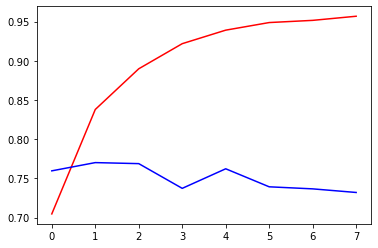

In [13]:
sns.lineplot(x=history.epoch, y=history.history["accuracy"], color="red")
sns.lineplot(x=history.epoch, y=history.history["val_accuracy"], color="blue")